# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade |
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline


boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [2]:
boston.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [3]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [4]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [6]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### 3. Separe os dados em validação e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2360873)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [8]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)
regr_3 = DecisionTreeRegressor(max_depth=2)
regr_4 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)
regr_3.fit(X_test, y_test)
regr_4.fit(X_test, y_test)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [9]:
mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O MSE da árvore de treinamento com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O MSE da árvore de treinamento com profundidade=2 é: 0,71
O MSE da árvore de treinamento com profundidade=8 é: 0,98


In [10]:
mse3 = regr_3.score(X_test, y_test)
mse4 = regr_4.score(X_test, y_test)

template = "O MSE da árvore de teste com profundidade={0} é: {1:.2f}"

print(template.format(regr_3.get_depth(),mse3).replace(".",","))
print(template.format(regr_4.get_depth(),mse4).replace(".",","))

O MSE da árvore de teste com profundidade=2 é: 0,69
O MSE da árvore de teste com profundidade=8 é: 0,99


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Árvore de teste regr_4 com valor de 0,99

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

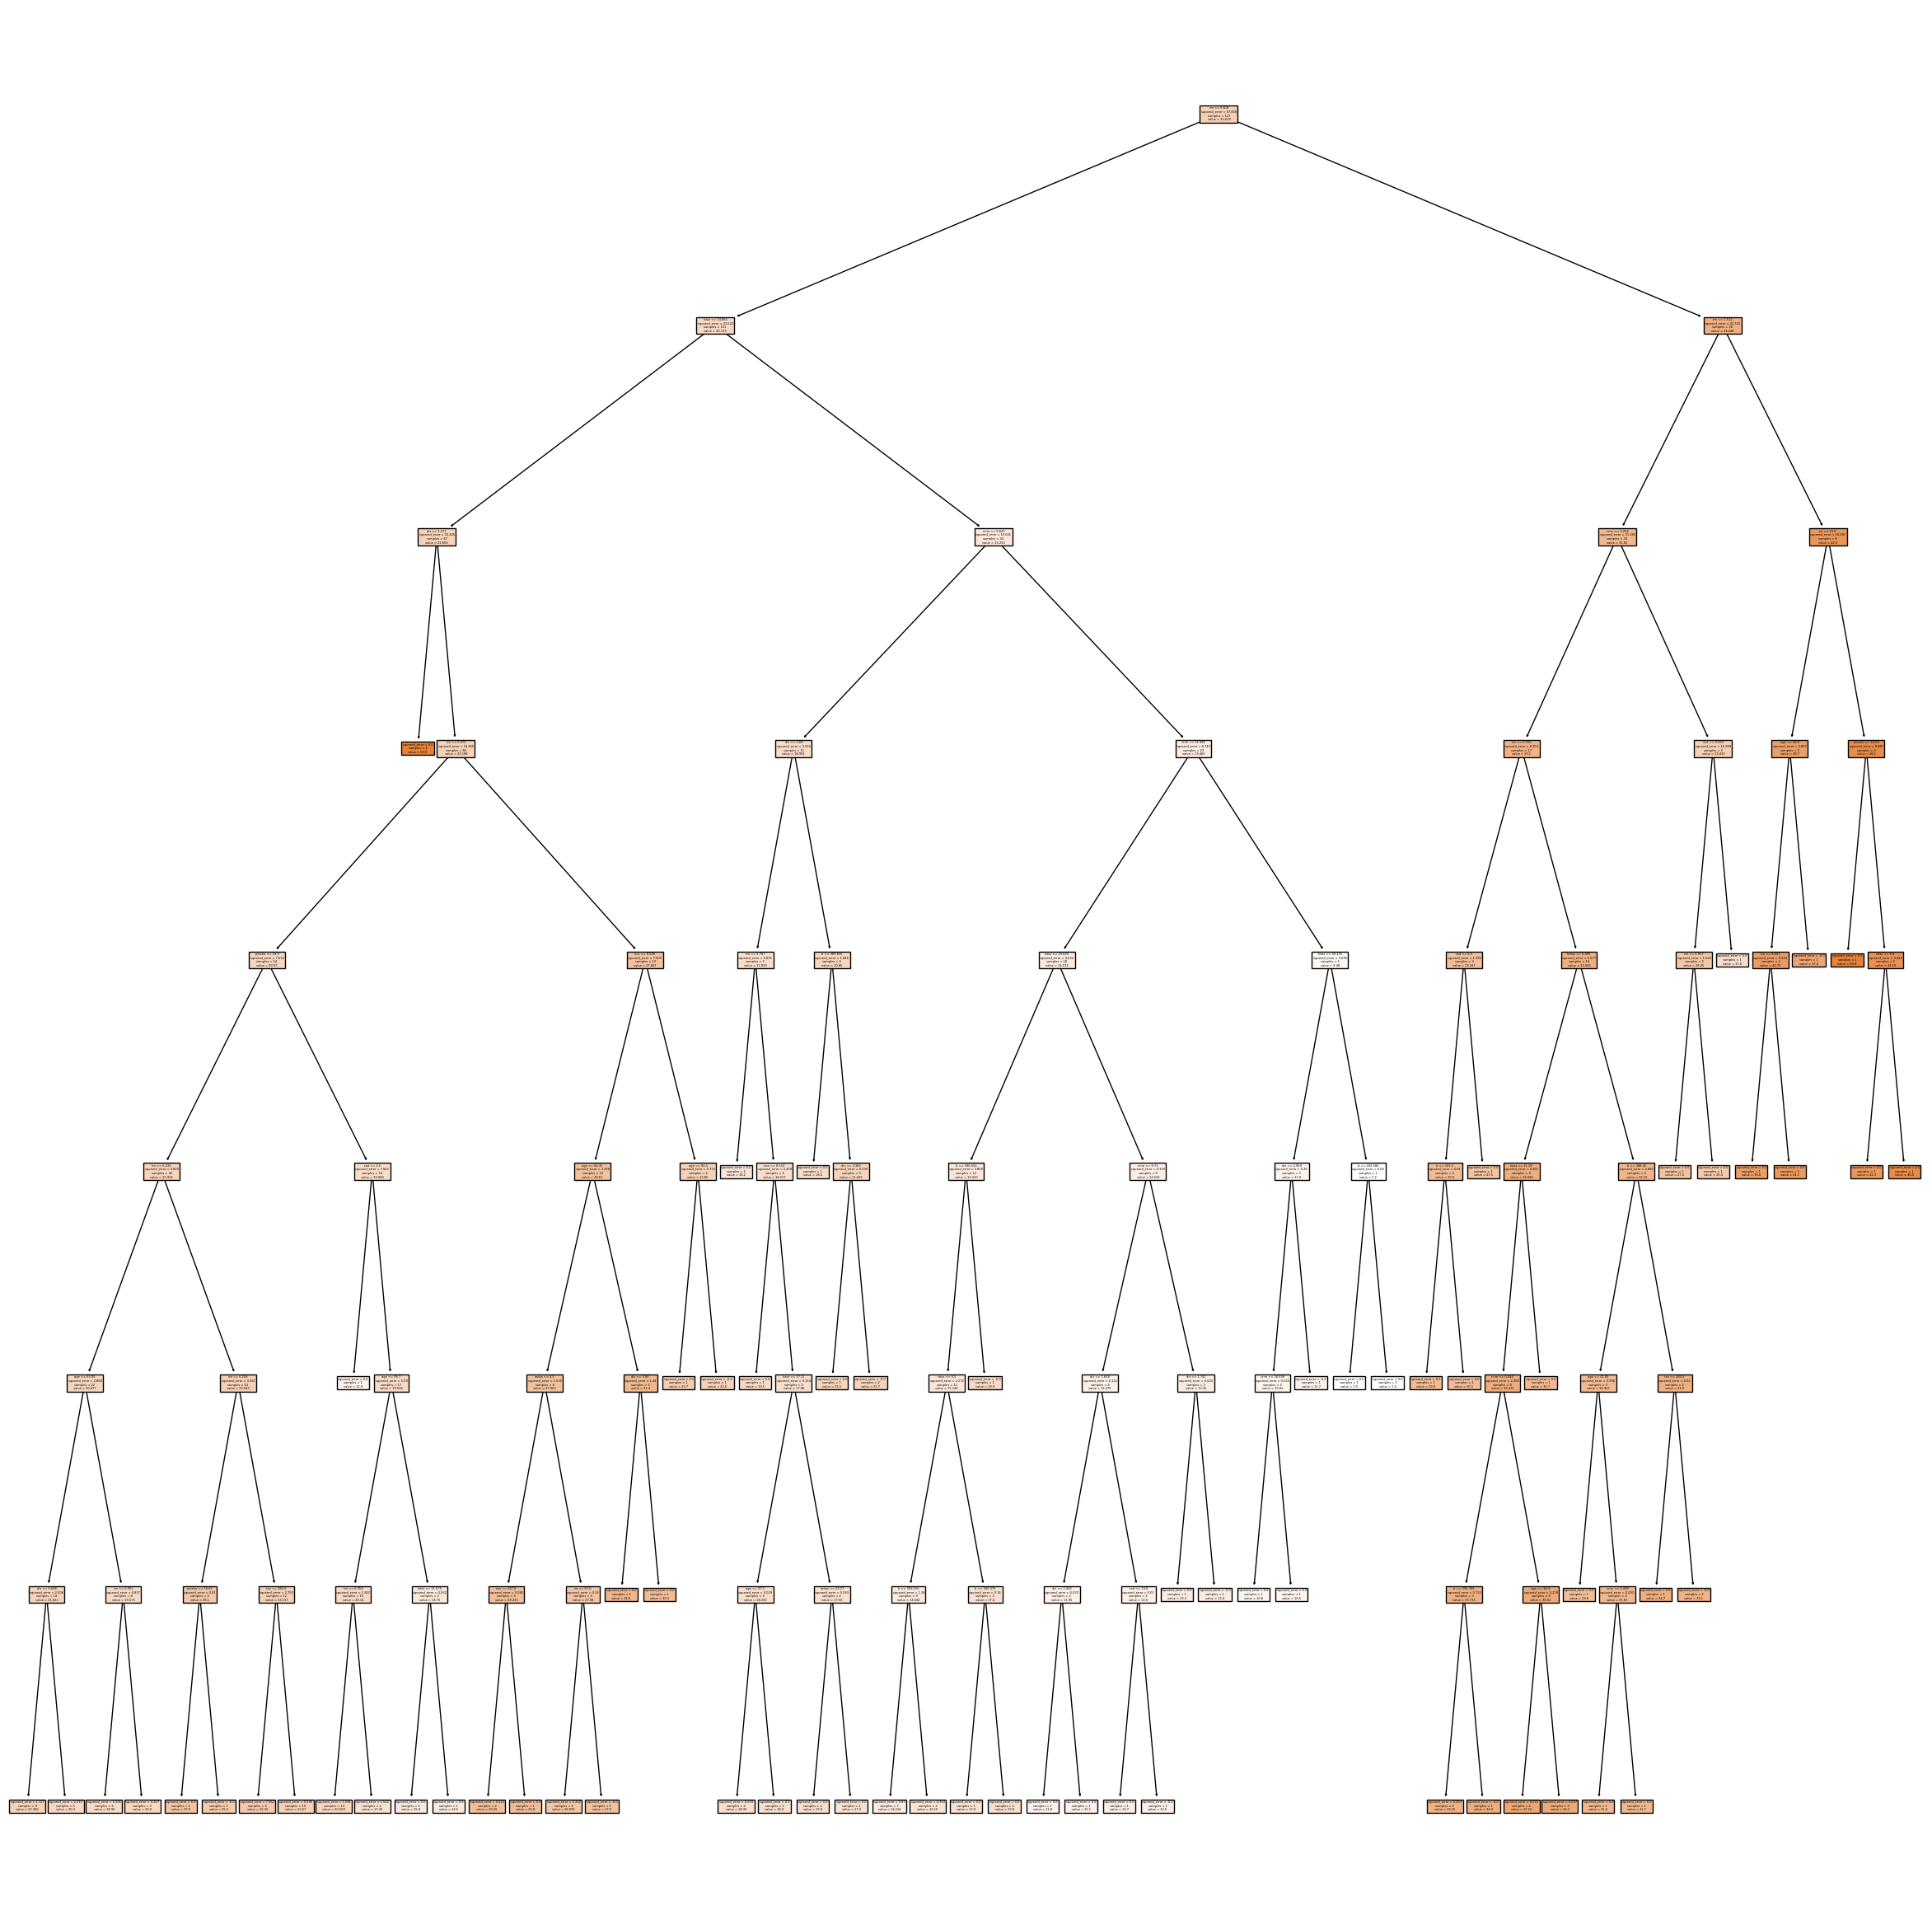

In [11]:
plt.rc('figure', figsize=(30, 30))
tp = tree.plot_tree(regr_4,
                    feature_names=X.columns,
                    filled=True)

In [14]:
representacao_textual = tree.export_text(regr_4)
print(representacao_textual)

|--- feature_5 <= 6.98
|   |--- feature_12 <= 14.40
|   |   |--- feature_12 <= 5.06
|   |   |   |--- feature_8 <= 4.50
|   |   |   |   |--- value: [28.48]
|   |   |   |--- feature_8 >  4.50
|   |   |   |   |--- value: [35.59]
|   |   |--- feature_12 >  5.06
|   |   |   |--- feature_5 <= 6.14
|   |   |   |   |--- feature_8 <= 7.50
|   |   |   |   |   |--- feature_5 <= 5.76
|   |   |   |   |   |   |--- value: [18.37]
|   |   |   |   |   |--- feature_5 >  5.76
|   |   |   |   |   |   |--- feature_10 <= 16.70
|   |   |   |   |   |   |   |--- value: [22.47]
|   |   |   |   |   |   |--- feature_10 >  16.70
|   |   |   |   |   |   |   |--- feature_6 <= 45.40
|   |   |   |   |   |   |   |   |--- value: [21.68]
|   |   |   |   |   |   |   |--- feature_6 >  45.40
|   |   |   |   |   |   |   |   |--- value: [19.82]
|   |   |   |   |--- feature_8 >  7.50
|   |   |   |   |   |--- value: [23.10]
|   |   |   |--- feature_5 >  6.14
|   |   |   |   |--- feature_12 <= 9.93
|   |   |   |   |   |--- featu

In [12]:
regr_4 = DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

regr_4.fit(X_train, y_train)

mse4 = regr_4.score(X_test, y_test)
mse4

0.6457573669181629

n_minimo,1,2,3,4,5,6,7,8,9
profundidade,,,,,,,,,
1,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163,0.361163
2,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035,0.610035
3,0.625087,0.607844,0.608277,0.596417,0.625875,0.634217,0.645757,0.645757,0.645757
4,0.626006,0.692832,0.672232,0.676667,0.627247,0.682184,0.665746,0.658618,0.658618
5,0.686752,0.666439,0.728635,0.728312,0.681329,0.738481,0.717710,0.710582,0.702706
6,0.689193,0.667912,0.732195,0.731462,0.664891,0.722680,0.722235,0.717054,0.709117
7,0.612001,0.744630,0.729167,0.726462,0.664906,0.740846,0.722963,0.718808,0.705538
8,0.698280,0.750668,0.727154,0.730650,0.676645,0.732162,0.735779,0.722554,0.708404


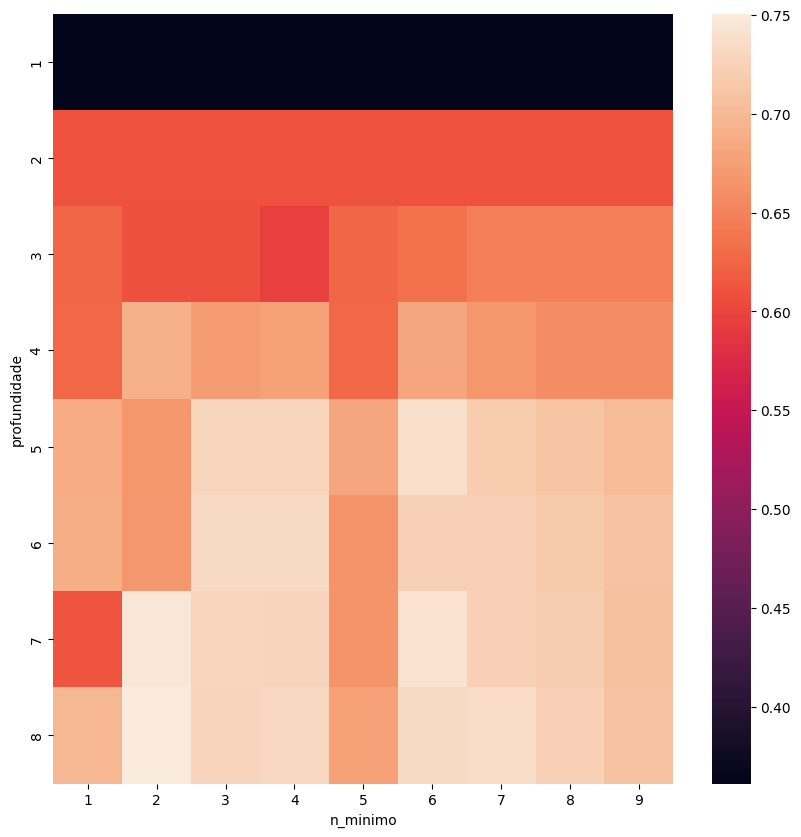

In [13]:
plt.rc('figure', figsize=(10, 10))

mses = []
ind_i = []
ind_j = []

for i in range(1, 9):
    for j in range(1, 10):
        regr_4 = DecisionTreeRegressor(max_depth=i, min_samples_leaf=j)
        regr_4.fit(X_train, y_train)
        mse4 = regr_4.score(X_test, y_test)
        mses.append(mse4)
        ind_i.append(i)
        ind_j.append(j)

df_mse = pd.DataFrame({'mses':mses, 'profundidade':ind_i, 'n_minimo':ind_j})
sns.heatmap(df_mse.pivot(index='profundidade', columns='n_minimo', values='mses'))
df_mse.pivot(index='profundidade', columns='n_minimo', values='mses')